<a href="https://colab.research.google.com/github/Nazwa-Aulia/Final-Project-Data-Mining-Kelompok-A/blob/main/Final_Project_Data_Mining_Kelompok_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ANALISIS SENTIMEN KEBIJAKAN SISTEM ZONASI PPDB 2024**

**Anggota Kelompok A**


| NIM | Nama | Kontribusi |
|--------- | --------- | --------- |
| 11200940000052 |	Kevin Septiyan Candra | Scrapping, Preprocessing, Video |
| 11220940000018 |	Shafira Al Zuhra | Scrapping, Tokenisasi, PPT|
| 11220940000026 |	Nazwa Aulia | Scrapping, Preprocessing, Visualisasi dan interpretasi, PPT |
| 11220940000028 |	Alif Alamsyah | Scrapping, Stopword, Sentimen, Modeling, PPT|
| 11220940000074 |	Rachmat Nadhif Priatno |Scrapping, PPT, Video |


# Scrapping Data dari aplikasi X
[Google Collab Scrapping Data](https://github.com/Nazwa-Aulia/Final-Project-Data-Mining-Kelompok-A/blob/main/scrapping_data_zonasi_twitter.ipynb)

# Install Packages

In [72]:
!pip install Sastrawi
!pip install nltk
!pip install textblob
!pip install unidecode
!pip install html

  Using cached html-1.16.tar.gz (7.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


# Load Data

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# URL file baru di GitHub untuk data zonasi
data_url = "https://raw.githubusercontent.com/Nazwa-Aulia/Final-Project-Data-Mining-Kelompok-A/refs/heads/main/gab_zonasi2024.csv"

# Membaca file sentimen
try:
    data = pd.read_csv(data_url)
    print(f"File zonasi berhasil dibaca dengan {len(data)} baris.")
except Exception as e:
    print(f"Gagal membaca file zonasi. Error: {e}")
data

File zonasi berhasil dibaca dengan 1151 baris.


,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1752478991825711108,Tue Jan 30 23:52:23 +0000 2024,1,Ngakalin sistem zonasi tuh pindah ke kartu keluarga orang. Kalau ini kan dia pindah alamat karena emang rumahnya pindah ke rumah dinas.,1752479906083262878,NaN,mrsimple12341,in,NaN,0,0,0,https://x.com/mrsimple12341/status/1752479906083262878,1513606435099217923,mrsimple12341
1,1752478991825711108,Tue Jan 30 23:50:21 +0000 2024,1,Gue tau persis KTPnya emang Jl. Cicendo no. 1. Dan pindah domisilinya sah bukan ngakalin sistem zonasi,1752479393254138224,NaN,mrsimple12341,in,NaN,0,1,0,https://x.com/mrsimple12341/status/1752479393254138224,1513606435099217923,mrsimple12341
2,1752476489097056579,Tue Jan 30 23:38:49 +0000 2024,0,gw sebel bgt sama sistem zonasi ini udah ga masuk akal bgt yg keterima tuh yg jaraknya 500m an sedangkan di sekolah tsb ga padat penduduk. anak-anak pun ga mikirin nilai harus gede atau apa soalnya ortunya udah ngakalin pindah KK dari jauh jauh hari,1752476489097056579,NaN,NaN,in,NaN,0,0,0,https://x.com/beautifullsun6/status/1752476489097056579,1285141959149944832,beautifullsun6
3,1752237596024156628,Tue Jan 30 21:44:40 +0000 2024,0,@ontajenius sistem zonasi nyusahin bgt sih kasian yg rumabnya jauh dr sekolahan gamasuk mana mana dannmau gamau swatsa https://t.co/rzWpIJT0NY,1752447762208354736,NaN,ontajenius,in,NaN,0,0,0,https://x.com/terjiminjimim/status/1752447762208354736,840051113437028353,terjiminjimim
4,1752237596024156628,Tue Jan 30 19:55:49 +0000 2024,0,@lalalamoonie_ @ontajenius Susah kalo sistem zonasi ya anak2 situ dulu yang didahuluin walau nem masuk di bandung zonasi udh jalan brp tahun tp sekolah favorite masih itu2 aja:(,1752420371272458751,NaN,lalalamoonie_,in,NaN,0,0,0,https://x.com/sarenghaeo/status/1752420371272458751,609734754,sarenghaeo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1146,1863864807121953218,Tue Dec 03 08:40:29 +0000 2024,4,@RizkiR4madani @tatagibrig @adhie_thrash @PalimaWiwi47893 @bangsupians semoga bisa bangun SMP Negeri disetiap kelurahan sehingga sistem zonasi benar benar berkeadilan dan bermanfaat bagi masyarakat *ga ada lagi uang bangku,1863865880977063966,NaN,RizkiR4madani,in,pinggir selatan Jakarta,0,1,0,https://x.com/AzisDadun_/status/1863865880977063966,2283951606,AzisDadun_
1147,1863863773553107227,Tue Dec 03 08:32:07 +0000 2024,0,Dinas Pendidikan dan Kebudayaan Kota Bengkulu Provinsi Bengkulu mendukung upaya penghapusan Penerimaan Peserta Didik Baru (PPDB) sistem zonasi karena menjadi salah satu upaya pemerintah dalam melakukan pemerataan pendidikan di wilayah tersebut.https://t.co/CtgvdPpCXD,1863863773553107227,NaN,NaN,in,NaN,0,0,0,https://x.com/ANTARABengkulu/status/1863863773553107227,423220305,ANTARABengkulu
1148,1863650982237966661,Tue Dec 03 07:09:41 +0000 2024,8,@irwndfrry Hampir semua aku setuju sm pergerakan ferry irwandy apalagi ttg sistem zonasi sekolah judol sampe santet2an. Tapi kalo soal anime jelek itu ngga akan pernah setuju aku.,1863843028672418040,NaN,irwndfrry,in,Indonesia,0,0,0,https://x.com/shofiyullohm_/status/1863843028672418040,1259306412,shofiyullohm_
1149,1863779619222220800,Tue Dec 03 02:57:43 +0000 2024,0,Nasib Guru Honorer sebagai Tumbal dalam Sistem Zonasi Pendidikan https://t.co/9Efjw7ROor,1863779619222220800,NaN,NaN,in,Indonesia,0,0,0,https://x.com/fendiv/status/1863779619222220800,4791041,fendiv


In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1151 entries, 0 to 1150
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   conversation_id_str      1151 non-null   int64 
 1   created_at               1151 non-null   object
 2   favorite_count           1151 non-null   int64 
 3   full_text                1151 non-null   object
 4   id_str                   1151 non-null   int64 
 5   image_url                67 non-null     object
 6   in_reply_to_screen_name  703 non-null    object
 7   lang                     1151 non-null   object
 8   location                 646 non-null    object
 9   quote_count              1151 non-null   int64 
 10  reply_count              1151 non-null   int64 
 11  retweet_count            1151 non-null   int64 
 12  tweet_url                1151 non-null   object
 13  user_id_str              1151 non-null   int64 
 14  username                 1151 non-null  

# Preprocessing

In [75]:
# Menghapus kolom yang tidak diperlukan
data.drop(columns=['image_url', 'lang', 'location', 'tweet_url', 'user_id_str'], inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1151 entries, 0 to 1150
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   conversation_id_str      1151 non-null   int64 
 1   created_at               1151 non-null   object
 2   favorite_count           1151 non-null   int64 
 3   full_text                1151 non-null   object
 4   id_str                   1151 non-null   int64 
 5   in_reply_to_screen_name  703 non-null    object
 6   quote_count              1151 non-null   int64 
 7   reply_count              1151 non-null   int64 
 8   retweet_count            1151 non-null   int64 
 9   username                 1151 non-null   object
dtypes: int64(6), object(4)
memory usage: 90.0+ KB


In [76]:
# Cek Duplikat data
data.duplicated().sum()

0

In [77]:
duplikat_semua = data[data.duplicated(subset=['full_text'], keep=False)]
duplikat_semua


,conversation_id_str,created_at,favorite_count,full_text,id_str,in_reply_to_screen_name,quote_count,reply_count,retweet_count,username
1015,1861220640319250682,Tue Nov 26 01:29:15 +0000 2024,0,Wapres Gibran Perintahkan Zonasi PPDB Dihapus Ombudsman Sebut Sistem Zonasi untuk Pemerataan Pendidikan https://t.co/2wSepnuQqQ,1861220640319250682,NaN,0,0,0,kalderanews
1051,1860859238819746064,Mon Nov 25 01:33:10 +0000 2024,0,Wapres Gibran Perintahkan Zonasi PPDB Dihapus Ombudsman Sebut Sistem Zonasi untuk Pemerataan Pendidikan https://t.co/2wSepnuQqQ,1860859238819746064,NaN,0,0,0,kalderanews


In [78]:
data = data.drop_duplicates(subset=['full_text'])
# Menyetel ulang indeks
data = data.reset_index(drop=True)
data

,conversation_id_str,created_at,favorite_count,full_text,id_str,in_reply_to_screen_name,quote_count,reply_count,retweet_count,username
0,1752478991825711108,Tue Jan 30 23:52:23 +0000 2024,1,Ngakalin sistem zonasi tuh pindah ke kartu keluarga orang. Kalau ini kan dia pindah alamat karena emang rumahnya pindah ke rumah dinas.,1752479906083262878,mrsimple12341,0,0,0,mrsimple12341
1,1752478991825711108,Tue Jan 30 23:50:21 +0000 2024,1,Gue tau persis KTPnya emang Jl. Cicendo no. 1. Dan pindah domisilinya sah bukan ngakalin sistem zonasi,1752479393254138224,mrsimple12341,0,1,0,mrsimple12341
2,1752476489097056579,Tue Jan 30 23:38:49 +0000 2024,0,gw sebel bgt sama sistem zonasi ini udah ga masuk akal bgt yg keterima tuh yg jaraknya 500m an sedangkan di sekolah tsb ga padat penduduk. anak-anak pun ga mikirin nilai harus gede atau apa soalnya ortunya udah ngakalin pindah KK dari jauh jauh hari,1752476489097056579,NaN,0,0,0,beautifullsun6
3,1752237596024156628,Tue Jan 30 21:44:40 +0000 2024,0,@ontajenius sistem zonasi nyusahin bgt sih kasian yg rumabnya jauh dr sekolahan gamasuk mana mana dannmau gamau swatsa https://t.co/rzWpIJT0NY,1752447762208354736,ontajenius,0,0,0,terjiminjimim
4,1752237596024156628,Tue Jan 30 19:55:49 +0000 2024,0,@lalalamoonie_ @ontajenius Susah kalo sistem zonasi ya anak2 situ dulu yang didahuluin walau nem masuk di bandung zonasi udh jalan brp tahun tp sekolah favorite masih itu2 aja:(,1752420371272458751,lalalamoonie_,0,0,0,sarenghaeo
...,...,...,...,...,...,...,...,...,...,...
1145,1863864807121953218,Tue Dec 03 08:40:29 +0000 2024,4,@RizkiR4madani @tatagibrig @adhie_thrash @PalimaWiwi47893 @bangsupians semoga bisa bangun SMP Negeri disetiap kelurahan sehingga sistem zonasi benar benar berkeadilan dan bermanfaat bagi masyarakat *ga ada lagi uang bangku,1863865880977063966,RizkiR4madani,0,1,0,AzisDadun_
1146,1863863773553107227,Tue Dec 03 08:32:07 +0000 2024,0,Dinas Pendidikan dan Kebudayaan Kota Bengkulu Provinsi Bengkulu mendukung upaya penghapusan Penerimaan Peserta Didik Baru (PPDB) sistem zonasi karena menjadi salah satu upaya pemerintah dalam melakukan pemerataan pendidikan di wilayah tersebut.https://t.co/CtgvdPpCXD,1863863773553107227,NaN,0,0,0,ANTARABengkulu
1147,1863650982237966661,Tue Dec 03 07:09:41 +0000 2024,8,@irwndfrry Hampir semua aku setuju sm pergerakan ferry irwandy apalagi ttg sistem zonasi sekolah judol sampe santet2an. Tapi kalo soal anime jelek itu ngga akan pernah setuju aku.,1863843028672418040,irwndfrry,0,0,0,shofiyullohm_
1148,1863779619222220800,Tue Dec 03 02:57:43 +0000 2024,0,Nasib Guru Honorer sebagai Tumbal dalam Sistem Zonasi Pendidikan https://t.co/9Efjw7ROor,1863779619222220800,NaN,0,0,0,fendiv


In [79]:
# Cek Missing Value
data.isnull().sum()

,0
conversation_id_str,0
created_at,0
favorite_count,0
full_text,0
id_str,0
in_reply_to_screen_name,447
quote_count,0
reply_count,0
retweet_count,0
username,0


In [80]:
# Imputasi missing value dalam data 'in_reply_to_screen_name' dengan not reply (jika id_str dan conversation_id_str nya sama)
data['in_reply_to_screen_name'] = data.apply(lambda row: 'not a reply' if pd.isna(row['in_reply_to_screen_name']) and row['id_str'] == row['id_str'] else row['in_reply_to_screen_name'],
    axis=1)
data.isnull().sum()

,0
conversation_id_str,0
created_at,0
favorite_count,0
full_text,0
id_str,0
in_reply_to_screen_name,0
quote_count,0
reply_count,0
retweet_count,0
username,0


In [81]:
data[data['in_reply_to_screen_name']== 'not a reply']

,conversation_id_str,created_at,favorite_count,full_text,id_str,in_reply_to_screen_name,quote_count,reply_count,retweet_count,username
2,1752476489097056579,Tue Jan 30 23:38:49 +0000 2024,0,gw sebel bgt sama sistem zonasi ini udah ga masuk akal bgt yg keterima tuh yg jaraknya 500m an sedangkan di sekolah tsb ga padat penduduk. anak-anak pun ga mikirin nilai harus gede atau apa soalnya ortunya udah ngakalin pindah KK dari jauh jauh hari,1752476489097056579,not a reply,0,0,0,beautifullsun6
13,1752188978332377397,Tue Jan 30 04:36:21 +0000 2024,0,sampe sekarang masih sedih karena covid gua belum puas jadi anak smp karena covid sistem ppdb pake zonasi bikin hilang harapan buat dapetin sma unggul (gua) sampe sekarang rasanya ga terima aja gitu. jadi masa sma gua begitu flat karena terlalu fokus ambis buat ngejar ptn,1752188978332377397,not a reply,0,0,0,antihatees
20,1751632403653906452,Sun Jan 28 15:44:43 +0000 2024,0,Udh suruh keliling indo aja pake sistem zonasi,1751632403653906452,not a reply,0,0,0,dayinsides
24,1751500944230220111,Sun Jan 28 07:02:21 +0000 2024,0,Sudah kuduga Tolong kalo terpilih ppdb sistem zonasi dihapus. Tks https://t.co/4eFoqKLp7j,1751500944230220111,not a reply,1,0,0,0xkowesopo
33,1751194568517955608,Sat Jan 27 10:44:55 +0000 2024,0,jujur abis stalk akun alumni 5 ang 30 SUPER DUPER KEREN ?????? kayak mereka kan belum pake sistem zonasi sekelas rata rata pada dapet ptn top 10,1751194568517955608,not a reply,0,0,0,dvresy
...,...,...,...,...,...,...,...,...,...,...
1135,1864570548996722787,Thu Dec 05 07:20:35 +0000 2024,3,Pemkot Surabaya Tunggu Juknis Soal Rencana Penghapusan Sistem Zonasi dalam PPDB https://t.co/jjhqbvAvTM,1864570548996722787,not a reply,0,0,0,e100ss
1136,1864542959292830118,Thu Dec 05 05:30:57 +0000 2024,0,Wali Kota Surabaya Eri Cahyadi merancang sejumlah skema baru penerimaan siswa jalur zonasi. Formulasi itu dibuat untuk membenahi sistem penerimaan peserta didik baru (PPDB) tahun depan. Menurut Eri skema itu disusun dari beragam keluhan warga. Terkait nilai misalnya. Ada warga https://t.co/qFbV1hP6nL,1864542959292830118,not a reply,0,0,0,jawapos
1138,1864527621897507315,Thu Dec 05 04:30:00 +0000 2024,0,Wapres Gibran Minta Sistem Zonasi PPDB Dihapus DPR Malah Usul Dievaluasi Agar Lebih Fleksibel https://t.co/bTmGkMNFXm,1864527621897507315,not a reply,0,0,0,jawapos
1146,1863863773553107227,Tue Dec 03 08:32:07 +0000 2024,0,Dinas Pendidikan dan Kebudayaan Kota Bengkulu Provinsi Bengkulu mendukung upaya penghapusan Penerimaan Peserta Didik Baru (PPDB) sistem zonasi karena menjadi salah satu upaya pemerintah dalam melakukan pemerataan pendidikan di wilayah tersebut.https://t.co/CtgvdPpCXD,1863863773553107227,not a reply,0,0,0,ANTARABengkulu


In [82]:
# Cek tipe data
data.dtypes

,0
conversation_id_str,int64
created_at,object
favorite_count,int64
full_text,object
id_str,int64
in_reply_to_screen_name,object
quote_count,int64
reply_count,int64
retweet_count,int64
username,object


In [83]:
# Ubah tipe data
data['created_at'] = pd.to_datetime(data['created_at'], errors='coerce')
data.dtypes

,0
conversation_id_str,int64
created_at,"datetime64[ns, UTC]"
favorite_count,int64
full_text,object
id_str,int64
in_reply_to_screen_name,object
quote_count,int64
reply_count,int64
retweet_count,int64
username,object


In [84]:
# Menghapus kolom 'conversation_id_str' dan 'id_str' karena sudah tidak diperlukan
data.drop(columns=['conversation_id_str', 'id_str'], inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1150 entries, 0 to 1149
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   created_at               1150 non-null   datetime64[ns, UTC]
 1   favorite_count           1150 non-null   int64              
 2   full_text                1150 non-null   object             
 3   in_reply_to_screen_name  1150 non-null   object             
 4   quote_count              1150 non-null   int64              
 5   reply_count              1150 non-null   int64              
 6   retweet_count            1150 non-null   int64              
 7   username                 1150 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(4), object(3)
memory usage: 72.0+ KB


In [85]:
# Statistika Deskriptif
data.describe(include = 'all')

,created_at,favorite_count,full_text,in_reply_to_screen_name,quote_count,reply_count,retweet_count,username
count,1150,1150.000000,1150,1150,1150.000000,1150.000000,1150.000000,1150
unique,NaN,NaN,1150,468,NaN,NaN,NaN,1020
top,NaN,NaN,Ngakalin sistem zonasi tuh pindah ke kartu keluarga orang. Kalau ini kan dia pindah alamat karena emang rumahnya pindah ke rumah dinas.,not a reply,NaN,NaN,NaN,detikcom
freq,NaN,NaN,1,447,NaN,NaN,NaN,7
mean,2024-07-17 06:25:25.743478272+00:00,9.583478,NaN,NaN,0.189565,0.818261,0.873913,NaN
min,2024-01-19 07:31:09+00:00,0.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN
25%,2024-04-14 05:35:55.750000128+00:00,0.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN
50%,2024-07-24 02:39:50.500000+00:00,0.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN
75%,2024-10-26 04:31:26.249999872+00:00,1.000000,NaN,NaN,0.000000,1.000000,0.000000,NaN
max,2024-12-17 12:50:53+00:00,3475.000000,NaN,NaN,48.000000,89.000000,234.000000,NaN


# Analisis Sentimen

In [86]:
pd.set_option('display.max_colwidth', None)
data['full_text']

,full_text
0,Ngakalin sistem zonasi tuh pindah ke kartu keluarga orang. Kalau ini kan dia pindah alamat karena emang rumahnya pindah ke rumah dinas.
1,Gue tau persis KTPnya emang Jl. Cicendo no. 1. Dan pindah domisilinya sah bukan ngakalin sistem zonasi
2,gw sebel bgt sama sistem zonasi ini udah ga masuk akal bgt yg keterima tuh yg jaraknya 500m an sedangkan di sekolah tsb ga padat penduduk. anak-anak pun ga mikirin nilai harus gede atau apa soalnya ortunya udah ngakalin pindah KK dari jauh jauh hari
3,@ontajenius sistem zonasi nyusahin bgt sih kasian yg rumabnya jauh dr sekolahan gamasuk mana mana dannmau gamau swatsa https://t.co/rzWpIJT0NY
4,@lalalamoonie_ @ontajenius Susah kalo sistem zonasi ya anak2 situ dulu yang didahuluin walau nem masuk di bandung zonasi udh jalan brp tahun tp sekolah favorite masih itu2 aja:(
...,...
1145,@RizkiR4madani @tatagibrig @adhie_thrash @PalimaWiwi47893 @bangsupians semoga bisa bangun SMP Negeri disetiap kelurahan sehingga sistem zonasi benar benar berkeadilan dan bermanfaat bagi masyarakat *ga ada lagi uang bangku
1146,Dinas Pendidikan dan Kebudayaan Kota Bengkulu Provinsi Bengkulu mendukung upaya penghapusan Penerimaan Peserta Didik Baru (PPDB) sistem zonasi karena menjadi salah satu upaya pemerintah dalam melakukan pemerataan pendidikan di wilayah tersebut.https://t.co/CtgvdPpCXD
1147,@irwndfrry Hampir semua aku setuju sm pergerakan ferry irwandy apalagi ttg sistem zonasi sekolah judol sampe santet2an. Tapi kalo soal anime jelek itu ngga akan pernah setuju aku.
1148,Nasib Guru Honorer sebagai Tumbal dalam Sistem Zonasi Pendidikan https://t.co/9Efjw7ROor


In [87]:
# URL file baru di GitHub untuk sentimen
sentimen_url = "https://raw.githubusercontent.com/Alfa4026/Data-Mining_2024/main/UAS/tweets_data/gab_zonasi2024-sentimen%20aja.csv"

# Membaca file sentimen
try:
    sentimen_data = pd.read_csv(sentimen_url)
    print(f"File sentimen berhasil dibaca dengan {len(sentimen_data)} baris.")
except Exception as e:
    print(f"Gagal membaca file sentimen. Error: {e}")

# Pastikan jumlah baris sesuai
if len(data) == len(sentimen_data):
    # Menambahkan kolom sentimen ke data
    data['sentimen'] = sentimen_data['sentimen']
    print("Kolom sentimen berhasil ditambahkan ke dataframe gabungan.")
else:
    print("Jumlah baris tidak cocok. Kolom sentimen tidak ditambahkan.")

# Menampilkan hasil akhir
data


File sentimen berhasil dibaca dengan 1150 baris.
Kolom sentimen berhasil ditambahkan ke dataframe gabungan.


,created_at,favorite_count,full_text,in_reply_to_screen_name,quote_count,reply_count,retweet_count,username,sentimen
0,2024-01-30 23:52:23+00:00,1,Ngakalin sistem zonasi tuh pindah ke kartu keluarga orang. Kalau ini kan dia pindah alamat karena emang rumahnya pindah ke rumah dinas.,mrsimple12341,0,0,0,mrsimple12341,negatif
1,2024-01-30 23:50:21+00:00,1,Gue tau persis KTPnya emang Jl. Cicendo no. 1. Dan pindah domisilinya sah bukan ngakalin sistem zonasi,mrsimple12341,0,1,0,mrsimple12341,netral
2,2024-01-30 23:38:49+00:00,0,gw sebel bgt sama sistem zonasi ini udah ga masuk akal bgt yg keterima tuh yg jaraknya 500m an sedangkan di sekolah tsb ga padat penduduk. anak-anak pun ga mikirin nilai harus gede atau apa soalnya ortunya udah ngakalin pindah KK dari jauh jauh hari,not a reply,0,0,0,beautifullsun6,negatif
3,2024-01-30 21:44:40+00:00,0,@ontajenius sistem zonasi nyusahin bgt sih kasian yg rumabnya jauh dr sekolahan gamasuk mana mana dannmau gamau swatsa https://t.co/rzWpIJT0NY,ontajenius,0,0,0,terjiminjimim,negatif
4,2024-01-30 19:55:49+00:00,0,@lalalamoonie_ @ontajenius Susah kalo sistem zonasi ya anak2 situ dulu yang didahuluin walau nem masuk di bandung zonasi udh jalan brp tahun tp sekolah favorite masih itu2 aja:(,lalalamoonie_,0,0,0,sarenghaeo,negatif
...,...,...,...,...,...,...,...,...,...
1145,2024-12-03 08:40:29+00:00,4,@RizkiR4madani @tatagibrig @adhie_thrash @PalimaWiwi47893 @bangsupians semoga bisa bangun SMP Negeri disetiap kelurahan sehingga sistem zonasi benar benar berkeadilan dan bermanfaat bagi masyarakat *ga ada lagi uang bangku,RizkiR4madani,0,1,0,AzisDadun_,positif
1146,2024-12-03 08:32:07+00:00,0,Dinas Pendidikan dan Kebudayaan Kota Bengkulu Provinsi Bengkulu mendukung upaya penghapusan Penerimaan Peserta Didik Baru (PPDB) sistem zonasi karena menjadi salah satu upaya pemerintah dalam melakukan pemerataan pendidikan di wilayah tersebut.https://t.co/CtgvdPpCXD,not a reply,0,0,0,ANTARABengkulu,negatif
1147,2024-12-03 07:09:41+00:00,8,@irwndfrry Hampir semua aku setuju sm pergerakan ferry irwandy apalagi ttg sistem zonasi sekolah judol sampe santet2an. Tapi kalo soal anime jelek itu ngga akan pernah setuju aku.,irwndfrry,0,0,0,shofiyullohm_,negatif
1148,2024-12-03 02:57:43+00:00,0,Nasib Guru Honorer sebagai Tumbal dalam Sistem Zonasi Pendidikan https://t.co/9Efjw7ROor,not a reply,0,0,0,fendiv,negatif


# Hashtags

In [88]:
df = data[data['full_text'].str.contains(r'#\w+', na=False)]

data['hashtags'] = df['full_text'].str.findall(r'#\w+')
data

,created_at,favorite_count,full_text,in_reply_to_screen_name,quote_count,reply_count,retweet_count,username,sentimen,hashtags
0,2024-01-30 23:52:23+00:00,1,Ngakalin sistem zonasi tuh pindah ke kartu keluarga orang. Kalau ini kan dia pindah alamat karena emang rumahnya pindah ke rumah dinas.,mrsimple12341,0,0,0,mrsimple12341,negatif,NaN
1,2024-01-30 23:50:21+00:00,1,Gue tau persis KTPnya emang Jl. Cicendo no. 1. Dan pindah domisilinya sah bukan ngakalin sistem zonasi,mrsimple12341,0,1,0,mrsimple12341,netral,NaN
2,2024-01-30 23:38:49+00:00,0,gw sebel bgt sama sistem zonasi ini udah ga masuk akal bgt yg keterima tuh yg jaraknya 500m an sedangkan di sekolah tsb ga padat penduduk. anak-anak pun ga mikirin nilai harus gede atau apa soalnya ortunya udah ngakalin pindah KK dari jauh jauh hari,not a reply,0,0,0,beautifullsun6,negatif,NaN
3,2024-01-30 21:44:40+00:00,0,@ontajenius sistem zonasi nyusahin bgt sih kasian yg rumabnya jauh dr sekolahan gamasuk mana mana dannmau gamau swatsa https://t.co/rzWpIJT0NY,ontajenius,0,0,0,terjiminjimim,negatif,NaN
4,2024-01-30 19:55:49+00:00,0,@lalalamoonie_ @ontajenius Susah kalo sistem zonasi ya anak2 situ dulu yang didahuluin walau nem masuk di bandung zonasi udh jalan brp tahun tp sekolah favorite masih itu2 aja:(,lalalamoonie_,0,0,0,sarenghaeo,negatif,NaN
...,...,...,...,...,...,...,...,...,...,...
1145,2024-12-03 08:40:29+00:00,4,@RizkiR4madani @tatagibrig @adhie_thrash @PalimaWiwi47893 @bangsupians semoga bisa bangun SMP Negeri disetiap kelurahan sehingga sistem zonasi benar benar berkeadilan dan bermanfaat bagi masyarakat *ga ada lagi uang bangku,RizkiR4madani,0,1,0,AzisDadun_,positif,NaN
1146,2024-12-03 08:32:07+00:00,0,Dinas Pendidikan dan Kebudayaan Kota Bengkulu Provinsi Bengkulu mendukung upaya penghapusan Penerimaan Peserta Didik Baru (PPDB) sistem zonasi karena menjadi salah satu upaya pemerintah dalam melakukan pemerataan pendidikan di wilayah tersebut.https://t.co/CtgvdPpCXD,not a reply,0,0,0,ANTARABengkulu,negatif,NaN
1147,2024-12-03 07:09:41+00:00,8,@irwndfrry Hampir semua aku setuju sm pergerakan ferry irwandy apalagi ttg sistem zonasi sekolah judol sampe santet2an. Tapi kalo soal anime jelek itu ngga akan pernah setuju aku.,irwndfrry,0,0,0,shofiyullohm_,negatif,NaN
1148,2024-12-03 02:57:43+00:00,0,Nasib Guru Honorer sebagai Tumbal dalam Sistem Zonasi Pendidikan https://t.co/9Efjw7ROor,not a reply,0,0,0,fendiv,negatif,NaN


# Clean Tweet

In [89]:
import itertools, re, pickle
import time, numpy as np, matplotlib.pyplot as plt, pandas as pd, seaborn as sns
from matplotlib.colors import ListedColormap
from textblob import TextBlob
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from unidecode import unidecode
from nltk.tag import CRFTagger
from html import unescape
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from tqdm import tqdm

In [90]:
data_twt = data[['full_text']]
data_twt

,full_text
0,Ngakalin sistem zonasi tuh pindah ke kartu keluarga orang. Kalau ini kan dia pindah alamat karena emang rumahnya pindah ke rumah dinas.
1,Gue tau persis KTPnya emang Jl. Cicendo no. 1. Dan pindah domisilinya sah bukan ngakalin sistem zonasi
2,gw sebel bgt sama sistem zonasi ini udah ga masuk akal bgt yg keterima tuh yg jaraknya 500m an sedangkan di sekolah tsb ga padat penduduk. anak-anak pun ga mikirin nilai harus gede atau apa soalnya ortunya udah ngakalin pindah KK dari jauh jauh hari
3,@ontajenius sistem zonasi nyusahin bgt sih kasian yg rumabnya jauh dr sekolahan gamasuk mana mana dannmau gamau swatsa https://t.co/rzWpIJT0NY
4,@lalalamoonie_ @ontajenius Susah kalo sistem zonasi ya anak2 situ dulu yang didahuluin walau nem masuk di bandung zonasi udh jalan brp tahun tp sekolah favorite masih itu2 aja:(
...,...
1145,@RizkiR4madani @tatagibrig @adhie_thrash @PalimaWiwi47893 @bangsupians semoga bisa bangun SMP Negeri disetiap kelurahan sehingga sistem zonasi benar benar berkeadilan dan bermanfaat bagi masyarakat *ga ada lagi uang bangku
1146,Dinas Pendidikan dan Kebudayaan Kota Bengkulu Provinsi Bengkulu mendukung upaya penghapusan Penerimaan Peserta Didik Baru (PPDB) sistem zonasi karena menjadi salah satu upaya pemerintah dalam melakukan pemerataan pendidikan di wilayah tersebut.https://t.co/CtgvdPpCXD
1147,@irwndfrry Hampir semua aku setuju sm pergerakan ferry irwandy apalagi ttg sistem zonasi sekolah judol sampe santet2an. Tapi kalo soal anime jelek itu ngga akan pernah setuju aku.
1148,Nasib Guru Honorer sebagai Tumbal dalam Sistem Zonasi Pendidikan https://t.co/9Efjw7ROor


In [91]:
def clean_text(text):
    # Hapus URL
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Hapus mention (@username)
    text = re.sub(r'@\w+', '', text)
    # Hapus hashtag (#hashtag)
    text = re.sub(r'#\w+', '', text)
    # Hapus angka
    text = re.sub(r'\d+', '', text)
    # Hapus tanda baca
    text = re.sub(r'[^\w\s]', '', text)
    # Hapus spasi berlebih
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Terapkan fungsi pada kolom 'tweet_text'
data_twt['cleaned_text'] = data_twt['full_text'].apply(clean_text)

In [92]:
data_twt

,full_text,cleaned_text
0,Ngakalin sistem zonasi tuh pindah ke kartu keluarga orang. Kalau ini kan dia pindah alamat karena emang rumahnya pindah ke rumah dinas.,Ngakalin sistem zonasi tuh pindah ke kartu keluarga orang Kalau ini kan dia pindah alamat karena emang rumahnya pindah ke rumah dinas
1,Gue tau persis KTPnya emang Jl. Cicendo no. 1. Dan pindah domisilinya sah bukan ngakalin sistem zonasi,Gue tau persis KTPnya emang Jl Cicendo no Dan pindah domisilinya sah bukan ngakalin sistem zonasi
2,gw sebel bgt sama sistem zonasi ini udah ga masuk akal bgt yg keterima tuh yg jaraknya 500m an sedangkan di sekolah tsb ga padat penduduk. anak-anak pun ga mikirin nilai harus gede atau apa soalnya ortunya udah ngakalin pindah KK dari jauh jauh hari,gw sebel bgt sama sistem zonasi ini udah ga masuk akal bgt yg keterima tuh yg jaraknya m an sedangkan di sekolah tsb ga padat penduduk anakanak pun ga mikirin nilai harus gede atau apa soalnya ortunya udah ngakalin pindah KK dari jauh jauh hari
3,@ontajenius sistem zonasi nyusahin bgt sih kasian yg rumabnya jauh dr sekolahan gamasuk mana mana dannmau gamau swatsa https://t.co/rzWpIJT0NY,sistem zonasi nyusahin bgt sih kasian yg rumabnya jauh dr sekolahan gamasuk mana mana dannmau gamau swatsa
4,@lalalamoonie_ @ontajenius Susah kalo sistem zonasi ya anak2 situ dulu yang didahuluin walau nem masuk di bandung zonasi udh jalan brp tahun tp sekolah favorite masih itu2 aja:(,Susah kalo sistem zonasi ya anak situ dulu yang didahuluin walau nem masuk di bandung zonasi udh jalan brp tahun tp sekolah favorite masih itu aja
...,...,...
1145,@RizkiR4madani @tatagibrig @adhie_thrash @PalimaWiwi47893 @bangsupians semoga bisa bangun SMP Negeri disetiap kelurahan sehingga sistem zonasi benar benar berkeadilan dan bermanfaat bagi masyarakat *ga ada lagi uang bangku,semoga bisa bangun SMP Negeri disetiap kelurahan sehingga sistem zonasi benar benar berkeadilan dan bermanfaat bagi masyarakat ga ada lagi uang bangku
1146,Dinas Pendidikan dan Kebudayaan Kota Bengkulu Provinsi Bengkulu mendukung upaya penghapusan Penerimaan Peserta Didik Baru (PPDB) sistem zonasi karena menjadi salah satu upaya pemerintah dalam melakukan pemerataan pendidikan di wilayah tersebut.https://t.co/CtgvdPpCXD,Dinas Pendidikan dan Kebudayaan Kota Bengkulu Provinsi Bengkulu mendukung upaya penghapusan Penerimaan Peserta Didik Baru PPDB sistem zonasi karena menjadi salah satu upaya pemerintah dalam melakukan pemerataan pendidikan di wilayah tersebut
1147,@irwndfrry Hampir semua aku setuju sm pergerakan ferry irwandy apalagi ttg sistem zonasi sekolah judol sampe santet2an. Tapi kalo soal anime jelek itu ngga akan pernah setuju aku.,Hampir semua aku setuju sm pergerakan ferry irwandy apalagi ttg sistem zonasi sekolah judol sampe santetan Tapi kalo soal anime jelek itu ngga akan pernah setuju aku
1148,Nasib Guru Honorer sebagai Tumbal dalam Sistem Zonasi Pendidikan https://t.co/9Efjw7ROor,Nasib Guru Honorer sebagai Tumbal dalam Sistem Zonasi Pendidikan


In [93]:
data_twt['cleaned_text'] = data_twt['cleaned_text'].str.lower()
data_twt

,full_text,cleaned_text
0,Ngakalin sistem zonasi tuh pindah ke kartu keluarga orang. Kalau ini kan dia pindah alamat karena emang rumahnya pindah ke rumah dinas.,ngakalin sistem zonasi tuh pindah ke kartu keluarga orang kalau ini kan dia pindah alamat karena emang rumahnya pindah ke rumah dinas
1,Gue tau persis KTPnya emang Jl. Cicendo no. 1. Dan pindah domisilinya sah bukan ngakalin sistem zonasi,gue tau persis ktpnya emang jl cicendo no dan pindah domisilinya sah bukan ngakalin sistem zonasi
2,gw sebel bgt sama sistem zonasi ini udah ga masuk akal bgt yg keterima tuh yg jaraknya 500m an sedangkan di sekolah tsb ga padat penduduk. anak-anak pun ga mikirin nilai harus gede atau apa soalnya ortunya udah ngakalin pindah KK dari jauh jauh hari,gw sebel bgt sama sistem zonasi ini udah ga masuk akal bgt yg keterima tuh yg jaraknya m an sedangkan di sekolah tsb ga padat penduduk anakanak pun ga mikirin nilai harus gede atau apa soalnya ortunya udah ngakalin pindah kk dari jauh jauh hari
3,@ontajenius sistem zonasi nyusahin bgt sih kasian yg rumabnya jauh dr sekolahan gamasuk mana mana dannmau gamau swatsa https://t.co/rzWpIJT0NY,sistem zonasi nyusahin bgt sih kasian yg rumabnya jauh dr sekolahan gamasuk mana mana dannmau gamau swatsa
4,@lalalamoonie_ @ontajenius Susah kalo sistem zonasi ya anak2 situ dulu yang didahuluin walau nem masuk di bandung zonasi udh jalan brp tahun tp sekolah favorite masih itu2 aja:(,susah kalo sistem zonasi ya anak situ dulu yang didahuluin walau nem masuk di bandung zonasi udh jalan brp tahun tp sekolah favorite masih itu aja
...,...,...
1145,@RizkiR4madani @tatagibrig @adhie_thrash @PalimaWiwi47893 @bangsupians semoga bisa bangun SMP Negeri disetiap kelurahan sehingga sistem zonasi benar benar berkeadilan dan bermanfaat bagi masyarakat *ga ada lagi uang bangku,semoga bisa bangun smp negeri disetiap kelurahan sehingga sistem zonasi benar benar berkeadilan dan bermanfaat bagi masyarakat ga ada lagi uang bangku
1146,Dinas Pendidikan dan Kebudayaan Kota Bengkulu Provinsi Bengkulu mendukung upaya penghapusan Penerimaan Peserta Didik Baru (PPDB) sistem zonasi karena menjadi salah satu upaya pemerintah dalam melakukan pemerataan pendidikan di wilayah tersebut.https://t.co/CtgvdPpCXD,dinas pendidikan dan kebudayaan kota bengkulu provinsi bengkulu mendukung upaya penghapusan penerimaan peserta didik baru ppdb sistem zonasi karena menjadi salah satu upaya pemerintah dalam melakukan pemerataan pendidikan di wilayah tersebut
1147,@irwndfrry Hampir semua aku setuju sm pergerakan ferry irwandy apalagi ttg sistem zonasi sekolah judol sampe santet2an. Tapi kalo soal anime jelek itu ngga akan pernah setuju aku.,hampir semua aku setuju sm pergerakan ferry irwandy apalagi ttg sistem zonasi sekolah judol sampe santetan tapi kalo soal anime jelek itu ngga akan pernah setuju aku
1148,Nasib Guru Honorer sebagai Tumbal dalam Sistem Zonasi Pendidikan https://t.co/9Efjw7ROor,nasib guru honorer sebagai tumbal dalam sistem zonasi pendidikan


# Tokenisasi dan Normalisasi

In [94]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab') # Add this line to download punkt_tab
nltk.download('stopwords')

# Download the TextBlob corpora (optional but recommended)
!python -m textblob.download_corpora

from nltk.tokenize import word_tokenize
# Download tokenizer
nltk.download('punkt')

import pandas as pd
import requests

# URL file baru di GitHub untuk slang
slang_urls = ["https://raw.githubusercontent.com/Nazwa-Aulia/Final-Project-Data-Mining-Kelompok-A/refs/heads/main/slang-zonasi.txt", "https://raw.githubusercontent.com/Nazwa-Aulia/Final-Project-Data-Mining-Kelompok-A/refs/heads/main/slang.txt"]


slang_dict = {"gajih": "gaji",
     "crening": "cleaning",
     "aamiin": "amin",
     "donk": "dong",
     "trimakasih": "terima kasih",
     "ajg": "anjing",
     "mkn": "makin",
     "kmi": "kami",
     "nbenatkah": "benarkah",
     "it": "itu",
     "mantullll": "mantap",
     "brmoga": "semoga",
     "alhmdulillah": "alhamdulillah",
     "tolonk": "tolong",
     "pkerjaan": "pekerjaan",
     "pwngangguran": "pengangguran",
     "alhamdulillaah": "alhamdulillah",
     "kren": "keren",
     "aminnn": "amin",
     "shat": "sehat",
     "klu": "kalau",
     "mmbuka": "membuka",
     "mlarat": "melarat",
     "jt": "juta",
     "banyqk": "banyak",
     "pnsiunan": "pensiunan",
     "hrgbrg": "harga barang",
     "brppun": "beberapapun",
              'kaporit': 'favorit'}

# Loop through each URL in slang_urls
for url in slang_urls:
    # Fetch the content of the file from the URL
    response = requests.get(url)
    response.raise_for_status()  # Raise an exception for bad responses (4xx or 5xx)

    # Split the content into lines and process each line
    for line in response.text.splitlines():
        if ':' in line: # Only process lines with the delimiter
            slang, standard = line.strip().split(':')
            slang_dict[slang.strip()] = standard.strip()

# Fungsi untuk mengganti slang dengan kata baku
def normalize_slang(text):
    words = word_tokenize(text.lower())
    return ' '.join([slang_dict.get(word, word) for word in words])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [95]:
data_twt['normalized_cleaned_full_text'] = data_twt['cleaned_text'].apply(normalize_slang)
data_twt['tokenized_text'] = data_twt['normalized_cleaned_full_text'].apply(lambda x: TextBlob(x).words)
data_twt

,full_text,cleaned_text,normalized_cleaned_full_text,tokenized_text
0,Ngakalin sistem zonasi tuh pindah ke kartu keluarga orang. Kalau ini kan dia pindah alamat karena emang rumahnya pindah ke rumah dinas.,ngakalin sistem zonasi tuh pindah ke kartu keluarga orang kalau ini kan dia pindah alamat karena emang rumahnya pindah ke rumah dinas,manipulasi sistem zonasi itu pindah kah kartu keluarga orang kalau ini akan dia pindah alamat karena memang rumah pindah kah rumah dinas,"[manipulasi, sistem, zonasi, itu, pindah, kah, kartu, keluarga, orang, kalau, ini, akan, dia, pindah, alamat, karena, memang, rumah, pindah, kah, rumah, dinas]"
1,Gue tau persis KTPnya emang Jl. Cicendo no. 1. Dan pindah domisilinya sah bukan ngakalin sistem zonasi,gue tau persis ktpnya emang jl cicendo no dan pindah domisilinya sah bukan ngakalin sistem zonasi,saya tahu persis kartu tanda penduduk nya memang jalan cicendo nomor dan pindah domisilinya sah bukan manipulasi sistem zonasi,"[saya, tahu, persis, kartu, tanda, penduduk, nya, memang, jalan, cicendo, nomor, dan, pindah, domisilinya, sah, bukan, manipulasi, sistem, zonasi]"
2,gw sebel bgt sama sistem zonasi ini udah ga masuk akal bgt yg keterima tuh yg jaraknya 500m an sedangkan di sekolah tsb ga padat penduduk. anak-anak pun ga mikirin nilai harus gede atau apa soalnya ortunya udah ngakalin pindah KK dari jauh jauh hari,gw sebel bgt sama sistem zonasi ini udah ga masuk akal bgt yg keterima tuh yg jaraknya m an sedangkan di sekolah tsb ga padat penduduk anakanak pun ga mikirin nilai harus gede atau apa soalnya ortunya udah ngakalin pindah kk dari jauh jauh hari,saya kesal banget sama sistem zonasi ini sudah tidak masuk akal banget yang diterima itu yang jaraknya m an sedangkan di sekolah tersebut tidak padat penduduk anakanak pun tidak pikiran nilai harus besar atau apa soalnya orang tua sudah manipulasi pindah kakak dari jauh jauh hari,"[saya, kesal, banget, sama, sistem, zonasi, ini, sudah, tidak, masuk, akal, banget, yang, diterima, itu, yang, jaraknya, m, an, sedangkan, di, sekolah, tersebut, tidak, padat, penduduk, anakanak, pun, tidak, pikiran, nilai, harus, besar, atau, apa, soalnya, orang, tua, sudah, manipulasi, pindah, kakak, dari, jauh, jauh, hari]"
3,@ontajenius sistem zonasi nyusahin bgt sih kasian yg rumabnya jauh dr sekolahan gamasuk mana mana dannmau gamau swatsa https://t.co/rzWpIJT0NY,sistem zonasi nyusahin bgt sih kasian yg rumabnya jauh dr sekolahan gamasuk mana mana dannmau gamau swatsa,sistem zonasi sulit banget sih kasihan yang rumah jauh dari sekolahan tidak masuk mana mana dan mau tidak mau swasta,"[sistem, zonasi, sulit, banget, sih, kasihan, yang, rumah, jauh, dari, sekolahan, tidak, masuk, mana, mana, dan, mau, tidak, mau, swasta]"
4,@lalalamoonie_ @ontajenius Susah kalo sistem zonasi ya anak2 situ dulu yang didahuluin walau nem masuk di bandung zonasi udh jalan brp tahun tp sekolah favorite masih itu2 aja:(,susah kalo sistem zonasi ya anak situ dulu yang didahuluin walau nem masuk di bandung zonasi udh jalan brp tahun tp sekolah favorite masih itu aja,susah kalau sistem zonasi iya anak situ dahulu yang didahulukan walau nem masuk di bandung zonasi sudah jalan berapa tahun tapi sekolah favorit masih itu saja,"[susah, kalau, sistem, zonasi, iya, anak, situ, dahulu, yang, didahulukan, walau, nem, masuk, di, bandung, zonasi, sudah, jalan, berapa, tahun, tapi, sekolah, favorit, masih, itu, saja]"
...,...,...,...,...
1145,@RizkiR4madani @tatagibrig @adhie_thrash @PalimaWiwi47893 @bangsupians semoga bisa bangun SMP Negeri disetiap kelurahan sehingga sistem zonasi benar benar berkeadilan dan bermanfaat bagi masyarakat *ga ada lagi uang bangku,semoga bisa bangun smp negeri disetiap kelurahan sehingga sistem zonasi benar benar berkeadilan dan bermanfaat bagi masyarakat ga ada lagi uang bangku,semoga bisa bangun sekolah menengah pertama negeri di setiap kelurahan sehingga sistem zonasi benar benar berkeadilan dan bermanfaat bagi masyarakat tidak ada lagi uang kursi,"[semoga, bisa, b

# Stopwords

In [96]:
import nltk
from nltk.tokenize import word_tokenize

# URL file baru di GitHub untuk stopwords
stopwords_urls = ["https://raw.githubusercontent.com/Nazwa-Aulia/Final-Project-Data-Mining-Kelompok-A/refs/heads/main/stopword-id-zonasi.txt",
                 "https://raw.githubusercontent.com/Nazwa-Aulia/Final-Project-Data-Mining-Kelompok-A/refs/heads/main/stopwords-id-mobil-listrik.txt",
                 "https://raw.githubusercontent.com/Nazwa-Aulia/Final-Project-Data-Mining-Kelompok-A/refs/heads/main/stopwords_en.txt",
                 "https://raw.githubusercontent.com/Nazwa-Aulia/Final-Project-Data-Mining-Kelompok-A/refs/heads/main/stopwords_id.txt"]

# Inisialisasi set untuk menyimpan stopwords
id_stop = set()

# Loop melalui setiap URL stopwords
for url in stopwords_urls:
    # Mengambil konten dari URL
    response = requests.get(url)
    response.raise_for_status()  # Raise HTTPError for bad responses (4xx or 5xx)

    # Menambahkan stopwords ke set
    words = response.text.splitlines()  # Split the content into lines
    cleaned_words = [word.strip().lower() for word in words]  # Clean and lowercase the words
    id_stop.update(cleaned_words)  # Update the id_stop set

# Tambahkan stopwords tambahan (opsional)
additional_stopwords = {'nya', 'iya', 'itu', 'kah', 'dan', 'ke', 'di', 'tengah tengah', 'pendidikan', 'menengah', 'penjabat',
                        'menjalankan', 'efek', 'lain-lain', 'berdagang', 'bedanya', 'berkembang', 'kepala', 'rumah', 'meteran',
                        'mencari', 'cari', 'perbandingan', 'dibandingkan', 'satunya', 'berbeda', 'dewan', 'perwakilan', 'maaf',
                        'rumah'}

id_stop.update(additional_stopwords)

# Fungsi untuk menghapus stopwords
def remove_custom_stopwords(text_list):
    # text_list is now a list of words, not a string
    return [word for word in text_list if word.lower() not in id_stop]

# Apply to DataFrame, no need to tokenize again
data_twt['no_stopwords'] = data_twt['tokenized_text'].apply(remove_custom_stopwords)

# Debugging
data_twt['no_stopwords']
data_twt

,full_text,cleaned_text,normalized_cleaned_full_text,tokenized_text,no_stopwords
0,Ngakalin sistem zonasi tuh pindah ke kartu keluarga orang. Kalau ini kan dia pindah alamat karena emang rumahnya pindah ke rumah dinas.,ngakalin sistem zonasi tuh pindah ke kartu keluarga orang kalau ini kan dia pindah alamat karena emang rumahnya pindah ke rumah dinas,manipulasi sistem zonasi itu pindah kah kartu keluarga orang kalau ini akan dia pindah alamat karena memang rumah pindah kah rumah dinas,"[manipulasi, sistem, zonasi, itu, pindah, kah, kartu, keluarga, orang, kalau, ini, akan, dia, pindah, alamat, karena, memang, rumah, pindah, kah, rumah, dinas]","[manipulasi, pindah, kartu, pindah, alamat, pindah, dinas]"
1,Gue tau persis KTPnya emang Jl. Cicendo no. 1. Dan pindah domisilinya sah bukan ngakalin sistem zonasi,gue tau persis ktpnya emang jl cicendo no dan pindah domisilinya sah bukan ngakalin sistem zonasi,saya tahu persis kartu tanda penduduk nya memang jalan cicendo nomor dan pindah domisilinya sah bukan manipulasi sistem zonasi,"[saya, tahu, persis, kartu, tanda, penduduk, nya, memang, jalan, cicendo, nomor, dan, pindah, domisilinya, sah, bukan, manipulasi, sistem, zonasi]","[persis, kartu, tanda, penduduk, cicendo, nomor, pindah, domisilinya, sah, manipulasi]"
2,gw sebel bgt sama sistem zonasi ini udah ga masuk akal bgt yg keterima tuh yg jaraknya 500m an sedangkan di sekolah tsb ga padat penduduk. anak-anak pun ga mikirin nilai harus gede atau apa soalnya ortunya udah ngakalin pindah KK dari jauh jauh hari,gw sebel bgt sama sistem zonasi ini udah ga masuk akal bgt yg keterima tuh yg jaraknya m an sedangkan di sekolah tsb ga padat penduduk anakanak pun ga mikirin nilai harus gede atau apa soalnya ortunya udah ngakalin pindah kk dari jauh jauh hari,saya kesal banget sama sistem zonasi ini sudah tidak masuk akal banget yang diterima itu yang jaraknya m an sedangkan di sekolah tersebut tidak padat penduduk anakanak pun tidak pikiran nilai harus besar atau apa soalnya orang tua sudah manipulasi pindah kakak dari jauh jauh hari,"[saya, kesal, banget, sama, sistem, zonasi, ini, sudah, tidak, masuk, akal, banget, yang, diterima, itu, yang, jaraknya, m, an, sedangkan, di, sekolah, tersebut, tidak, padat, penduduk, anakanak, pun, tidak, pikiran, nilai, harus, besar, atau, apa, soalnya, orang, tua, sudah, manipulasi, pindah, kakak, dari, jauh, jauh, hari]","[kesal, akal, diterima, jaraknya, padat, penduduk, anakanak, pikiran, nilai, manipulasi, pindah, kakak]"
3,@ontajenius sistem zonasi nyusahin bgt sih kasian yg rumabnya jauh dr sekolahan gamasuk mana mana dannmau gamau swatsa https://t.co/rzWpIJT0NY,sistem zonasi nyusahin bgt sih kasian yg rumabnya jauh dr sekolahan gamasuk mana mana dannmau gamau swatsa,sistem zonasi sulit banget sih kasihan yang rumah jauh dari sekolahan tidak masuk mana mana dan mau tidak mau swasta,"[sistem, zonasi, sulit, banget, sih, kasihan, yang, rumah, jauh, dari, sekolahan, tidak, masuk, mana, mana, dan, mau, tidak, mau, swasta]","[sulit, kasihan, sekolahan, swasta]"
4,@lalalamoonie_ @ontajenius Susah kalo sistem zonasi ya anak2 situ dulu yang didahuluin walau nem masuk di bandung zonasi udh jalan brp tahun tp sekolah favorite masih itu2 aja:(,susah kalo sistem zonasi ya anak situ dulu yang didahuluin walau nem masuk di bandung zonasi udh jalan brp tahun tp sekolah favorite masih itu aja,susah kalau sistem zonasi iya anak situ dahulu yang didahulukan walau nem masuk di bandung zonasi sudah jalan berapa tahun tapi sekolah favorit masih itu saja,"[susah, kalau, sistem, zonasi, iya, anak, situ, dahulu, yang, didahulukan, walau, nem, masuk, di, bandung, zonasi, sudah, jalan, berapa, tahun, tapi, sekolah, favorit, masih, itu, saja]","[susah, didahulukan, favorit]"
...,...,...,...,...,...
1145,@RizkiR4madani @tatagibrig @adhie_thrash @PalimaWiwi47893 @bangsupians semoga bisa bangun SMP Negeri disetiap kelurahan sehingga sistem zonasi benar benar berkeadilan dan bermanfaat bagi masyarakat *ga ada lagi uang bangku,

# Stemming

In [97]:
factory = StopWordRemoverFactory()
stemmer = StemmerFactory().create_stemmer()
sns.set(style="ticks", color_codes=True)
random_state = 170
'done'

'done'

In [98]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Daftar kata dasar manual
kata_dasar = ['setuju', 'sukses', 'terbaik', 'pemerataan', 'lingkungan', 'setara', 'alasan',
              'pendidikan', 'peserta', 'impian', 'kejuruan', 'menteri', 'terapkan', 'perdebatan',
              'hilangkan', ]  # Tambahkan kata dasar manual lainnya

# Fungsi untuk stemming dengan pengecekan kata dasar manual
def stem_text(text_list):
    stemmed_text = []
    for word in text_list:
        if word in kata_dasar:
            stemmed_text.append(word)
        else:
            stemmed_text.append(stemmer.stem(word))
    return stemmed_text

data_twt['stemmed_text'] = data_twt['no_stopwords'].apply(stem_text)
data_twt

,full_text,cleaned_text,normalized_cleaned_full_text,tokenized_text,no_stopwords,stemmed_text
0,Ngakalin sistem zonasi tuh pindah ke kartu keluarga orang. Kalau ini kan dia pindah alamat karena emang rumahnya pindah ke rumah dinas.,ngakalin sistem zonasi tuh pindah ke kartu keluarga orang kalau ini kan dia pindah alamat karena emang rumahnya pindah ke rumah dinas,manipulasi sistem zonasi itu pindah kah kartu keluarga orang kalau ini akan dia pindah alamat karena memang rumah pindah kah rumah dinas,"[manipulasi, sistem, zonasi, itu, pindah, kah, kartu, keluarga, orang, kalau, ini, akan, dia, pindah, alamat, karena, memang, rumah, pindah, kah, rumah, dinas]","[manipulasi, pindah, kartu, pindah, alamat, pindah, dinas]","[manipulasi, pindah, kartu, pindah, alamat, pindah, dinas]"
1,Gue tau persis KTPnya emang Jl. Cicendo no. 1. Dan pindah domisilinya sah bukan ngakalin sistem zonasi,gue tau persis ktpnya emang jl cicendo no dan pindah domisilinya sah bukan ngakalin sistem zonasi,saya tahu persis kartu tanda penduduk nya memang jalan cicendo nomor dan pindah domisilinya sah bukan manipulasi sistem zonasi,"[saya, tahu, persis, kartu, tanda, penduduk, nya, memang, jalan, cicendo, nomor, dan, pindah, domisilinya, sah, bukan, manipulasi, sistem, zonasi]","[persis, kartu, tanda, penduduk, cicendo, nomor, pindah, domisilinya, sah, manipulasi]","[persis, kartu, tanda, duduk, cicendo, nomor, pindah, domisili, sah, manipulasi]"
2,gw sebel bgt sama sistem zonasi ini udah ga masuk akal bgt yg keterima tuh yg jaraknya 500m an sedangkan di sekolah tsb ga padat penduduk. anak-anak pun ga mikirin nilai harus gede atau apa soalnya ortunya udah ngakalin pindah KK dari jauh jauh hari,gw sebel bgt sama sistem zonasi ini udah ga masuk akal bgt yg keterima tuh yg jaraknya m an sedangkan di sekolah tsb ga padat penduduk anakanak pun ga mikirin nilai harus gede atau apa soalnya ortunya udah ngakalin pindah kk dari jauh jauh hari,saya kesal banget sama sistem zonasi ini sudah tidak masuk akal banget yang diterima itu yang jaraknya m an sedangkan di sekolah tersebut tidak padat penduduk anakanak pun tidak pikiran nilai harus besar atau apa soalnya orang tua sudah manipulasi pindah kakak dari jauh jauh hari,"[saya, kesal, banget, sama, sistem, zonasi, ini, sudah, tidak, masuk, akal, banget, yang, diterima, itu, yang, jaraknya, m, an, sedangkan, di, sekolah, tersebut, tidak, padat, penduduk, anakanak, pun, tidak, pikiran, nilai, harus, besar, atau, apa, soalnya, orang, tua, sudah, manipulasi, pindah, kakak, dari, jauh, jauh, hari]","[kesal, akal, diterima, jaraknya, padat, penduduk, anakanak, pikiran, nilai, manipulasi, pindah, kakak]","[kesal, akal, terima, jarak, padat, duduk, anakanak, pikir, nilai, manipulasi, pindah, kakak]"
3,@ontajenius sistem zonasi nyusahin bgt sih kasian yg rumabnya jauh dr sekolahan gamasuk mana mana dannmau gamau swatsa https://t.co/rzWpIJT0NY,sistem zonasi nyusahin bgt sih kasian yg rumabnya jauh dr sekolahan gamasuk mana mana dannmau gamau swatsa,sistem zonasi sulit banget sih kasihan yang rumah jauh dari sekolahan tidak masuk mana mana dan mau tidak mau swasta,"[sistem, zonasi, sulit, banget, sih, kasihan, yang, rumah, jauh, dari, sekolahan, tidak, masuk, mana, mana, dan, mau, tidak, mau, swasta]","[sulit, kasihan, sekolahan, swasta]","[sulit, kasihan, sekolah, swasta]"
4,@lalalamoonie_ @ontajenius Susah kalo sistem zonasi ya anak2 situ dulu yang didahuluin walau nem masuk di bandung zonasi udh jalan brp tahun tp sekolah favorite masih itu2 aja:(,susah kalo sistem zonasi ya anak situ dulu yang didahuluin walau nem masuk di bandung zonasi udh jalan brp tahun tp sekolah favorite masih itu aja,susah kalau sistem zonasi iya anak situ dahulu yang didahulukan walau nem masuk di bandung zonasi sudah jalan berapa tahun tapi sekolah favorit masih itu saja,"[susah, kalau, sistem, zonasi, iya, anak, situ, dahulu, yang, didahulukan, walau, nem, masuk, di, bandung, zonasi, sudah, jalan, berapa, tahun, tapi, sekolah, favorit, masih, itu, sa

# Modeling

In [99]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample

In [100]:
# Mapping nilai sentimen menjadi 0, 1, 2
sentiment_mapping = {
    'negatif': 0,
    'netral': 1,
    'positif': 2
}

# Mengubah nilai sentimen pada kolom 'sentimen'
data_twt['sentimen'] = data['sentimen'].map(sentiment_mapping)


In [101]:
# Membuat DataFrame baru untuk data sentimen negatif (nilai 0)
data_twt_neg = data_twt[data_twt['sentimen'] == 0]

# Membuat DataFrame baru untuk data sentimen netral (nilai 1)
data_twt_net = data_twt[data_twt['sentimen'] == 1]

# Membuat DataFrame baru untuk data sentimen positif (nilai 2)
data_twt_pos = data_twt[data_twt['sentimen'] == 2]

# Hitung jumlah data sentimen negatif dan positif
negatif_count = data_twt_neg.shape[0]
netral_count = len(data_twt_net)
positif_count = data_twt_pos.shape[0]

# Lakukan oversampling pada data negatif dan positif
negatif_oversampled = resample(data_twt_neg, replace=True, n_samples=netral_count, random_state=42)
positif_oversampled = resample(data_twt_pos, replace=True, n_samples=netral_count, random_state=42)

# Gabungkan kembali data yang telah diresample
data_twt_balanced = pd.concat([data_twt_net, negatif_oversampled, positif_oversampled])

# Tampilkan jumlah data setelah oversampling
print(f"Jumlah data setelah oversampling: {len(data_twt_balanced)}")

Jumlah data setelah oversampling: 828


In [102]:
# Pisah data train dan test
x = data_twt_balanced['stemmed_text'].fillna('').apply(lambda x: ' '.join(x)) # Join the tokens back into a string
y = data_twt_balanced['sentimen'].fillna('')
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Menggunakan TF-IDF untuk mengubah teks menjadi fitur numerik
vectorizer = TfidfVectorizer(ngram_range=(1, 2))
x_train_vec = vectorizer.fit_transform(x_train)
x_test_vec = vectorizer.transform(x_test)

# Latih model Naive Bayes menggunakan fitur TF-IDF
naive_bayes = MultinomialNB()
naive_bayes.fit(x_train_vec, y_train)

# Prediksi dan evaluasi model
y_pred = naive_bayes.predict(x_test_vec)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=['Negatif', 'Netral', 'Positif'])

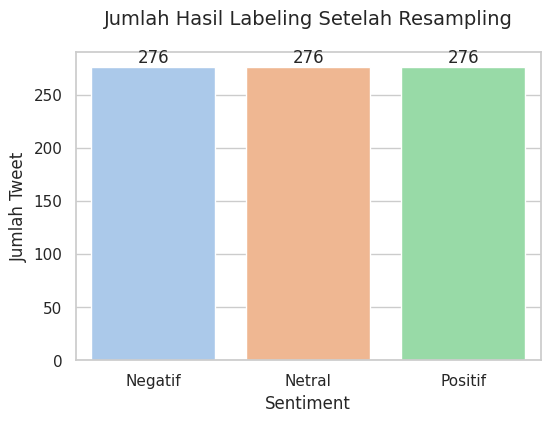

Akurasi Model Naive Bayes:  0.7168674698795181

Laporan Klasifikasi:
               precision    recall  f1-score   support

     Negatif       0.70      0.70      0.70        57
      Netral       0.76      0.52      0.62        54
     Positif       0.71      0.93      0.80        55

    accuracy                           0.72       166
   macro avg       0.72      0.72      0.71       166
weighted avg       0.72      0.72      0.71       166



In [103]:
# Plot barplot untuk jumlah data sentiment yang baru (oversampling)
sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(6, 4))
ax = sns.barplot(x=['Negatif', 'Netral', 'Positif'], y=[negatif_oversampled.shape[0], netral_count, positif_oversampled.shape[0]], palette='pastel')
plt.title('Jumlah Hasil Labeling Setelah Resampling', fontsize=14, pad=20)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Jumlah Tweet', fontsize=12)

for i, count in enumerate([negatif_oversampled.shape[0], netral_count, positif_oversampled.shape[0]]):
    ax.text(i, count + 0.10, str(count), ha='center', va='bottom')

plt.show()

# Evaluasi Model
print("Akurasi Model Naive Bayes: ", accuracy)
print("\nLaporan Klasifikasi:\n", classification_rep)

Setelah dilakukan **oversampling**, jumlah tweet pada setiap sentimen menjadi lebih seimbang, terutama karena sentimen netral merupakan kategori dengan jumlah terbesar.

**Akurasi model Naive Bayes** yang diterapkan untuk analisis sentimen didapatkan sekitar **71.6%**. Akurasi ini menunjukkan bahwa model memiliki kinerja yang cukup baik, meskipun masih ada beberapa kekurangan dalam mendeteksi sentimen tertentu.

**Kelebihan model ini** adalah kemampuan untuk mendeteksi sentimen **positif** dengan sangat baik, karena model ini memiliki **recall tertinggi (93%)** untuk kategori sentimen positif, yang berarti model sangat efektif dalam mendeteksi tweet positif meskipun jumlahnya relatif sedikit.

**Kekurangan model ini** terletak pada **sentimen netral**, di mana **recall-nya lebih rendah (50%)** dibandingkan dengan sentimen negatif dan positif. Ini berarti model lebih sering melewatkan tweet yang bersentimen netral, sehingga dapat memengaruhi ketepatan dalam mengklasifikasikan tweet yang tidak mengandung pernyataan emosional yang jelas.

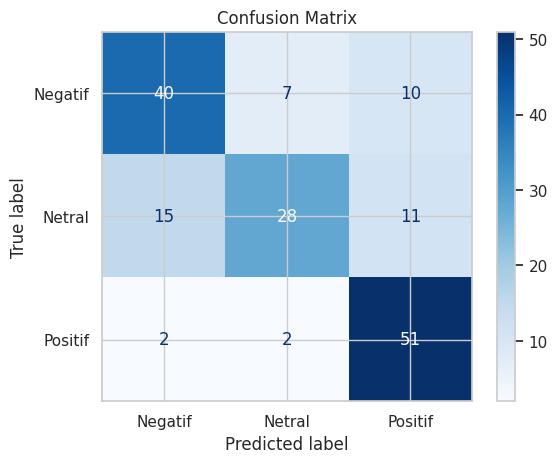

Cross-validation scores: [0.70676692 0.66165414 0.62878788 0.65151515 0.6969697 ]
Mean CV accuracy: 0.6691


In [104]:
# Evaluasi tambahan: Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=[0, 1, 2])
ConfusionMatrixDisplay(conf_matrix, display_labels=['Negatif', 'Netral', 'Positif']).plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# Tambahkan k-fold cross-validation
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(naive_bayes, x_train_vec, y_train, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV accuracy: {np.mean(cv_scores):.4f}")


Cross-validation menghasilkan skor rata-rata akurasi 66.91%, dengan skor individual bervariasi antara 62.88% dan 70.68%.
Variasi skor ini cukup kecil, menunjukkan bahwa model memiliki stabilitas yang baik di berbagai subset data.
Akurasi 66.91% cukup baik untuk dataset teks, tetapi masih bisa ditingkatkan, terutama untuk kelas netral.

# Visualisasi

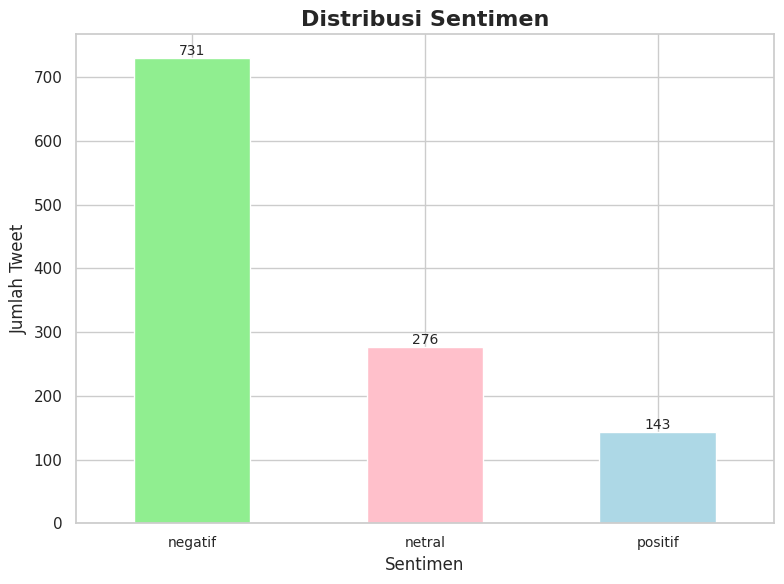

In [105]:
# Membuat grafik batang dengan nilai di atasnya
ax = data['sentimen'].value_counts().plot(
    kind='bar',
    color=['lightgreen', 'pink', 'lightblue'],
    figsize=(8, 6)
)

# Menambahkan judul dan label
plt.title('Distribusi Sentimen', fontsize=16, weight='bold')
plt.xlabel('Sentimen', fontsize=12)
plt.ylabel('Jumlah Tweet', fontsize=12)
plt.xticks(rotation=0, fontsize=10)

# Menambahkan nilai di atas batang
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', fontsize=10)

# Menampilkan grafik
plt.tight_layout()
plt.show()


Berdasarkan visualisasi di atas, mayoritas tweet yang dianalisis bernada negatif, yaitu sebanyak 731 tweet. Sementara itu, ada 275 tweet yang netral, dan hanya 143 tweet yang positif. Ini menunjukkan bahwa persepsi atau sentimen masyarakat terhadap topik sistem zonasi sekolah didominasi oleh komentar negatif.

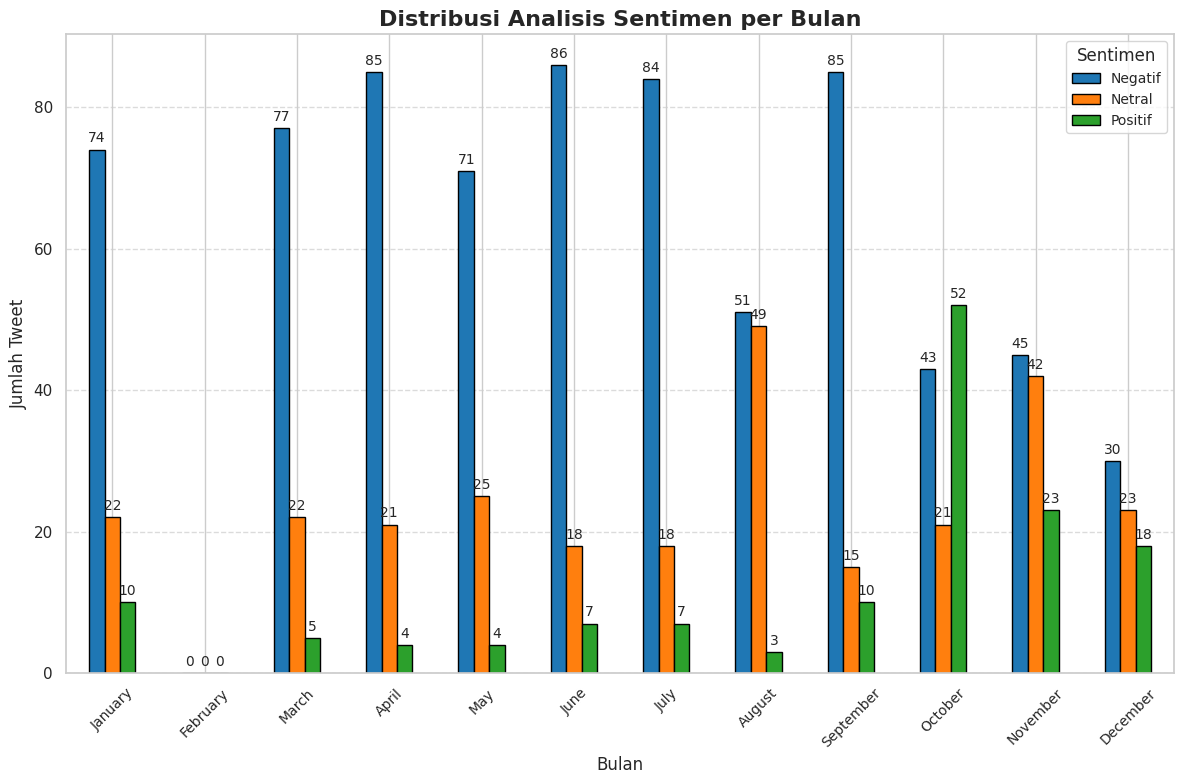

In [106]:
import matplotlib.pyplot as plt
import calendar
import seaborn as sns

# Menambahkan kolom bulan dalam nama
data['month_name'] = data['created_at'].dt.month.apply(lambda x: calendar.month_name[x])

# Mengelompokkan data berdasarkan bulan dan sentimen
sentiment_per_month = data.groupby(['month_name', 'sentimen']).size().unstack(fill_value=0)

# Mengurutkan berdasarkan urutan bulan
sentiment_per_month = sentiment_per_month.reindex(calendar.month_name[1:])

# Membuat plot
ax = sentiment_per_month.plot(
    kind='bar',
    figsize=(12, 8),
    color=['#1f77b4', '#ff7f0e', '#2ca02c'],
    edgecolor='black'
)

# Menambahkan jumlah di atas setiap batang
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', fontsize=10, padding=3)

# Menambahkan judul dan label
plt.title('Distribusi Analisis Sentimen per Bulan', fontsize=16, weight='bold')
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Jumlah Tweet', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend(title='Sentimen', labels=['Negatif', 'Netral', 'Positif'], fontsize=10, title_fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menampilkan grafik
plt.tight_layout()
plt.show()


Berdasarkan analisis 1.150 data X dari periode Januari–Desember 2024, lebih dari 60% masyarakat menunjukkan sentimen negatif terhadap kebijakan Sistem Zonasi PPDB. Sentimen negatif ini disebabkan oleh berbagai permasalahan yang muncul dalam pelaksanaan kebijakan tersebut, terutama karena kurangnya persiapan baik dari pemerintah maupun masyarakat dalam mengadopsi dan menerapkannya.  

Beberapa permasalahan utama yang disoroti masyarakat meliputi:  
1. **Infrastruktur**: Ketidaksiapan fasilitas pendukung sekolah.  
2. **Lokasi Sekolah**: Ketimpangan distribusi sekolah yang tidak merata.  
3. **Pemerataan Guru**: Distribusi guru yang tidak seimbang, terutama di daerah tertentu.  
4. **Praktik Jual-Beli Kursi dan Pungli**: Maraknya pelanggaran seperti ini semakin menambah keresahan masyarakat.  

Namun, pada bulan Oktober, terdapat peningkatan sentimen positif dari masyarakat. Hal ini dipicu oleh pernyataan ketiga Bacawagub DKI Jakarta dalam debat kedua Pilgub Jakarta 2024, di mana mereka sepakat mendukung penerapan sistem zonasi, baik di sekolah negeri maupun swasta. Dukungan ini diapresiasi oleh sebagian masyarakat yang setuju dengan visi kebijakan tersebut.



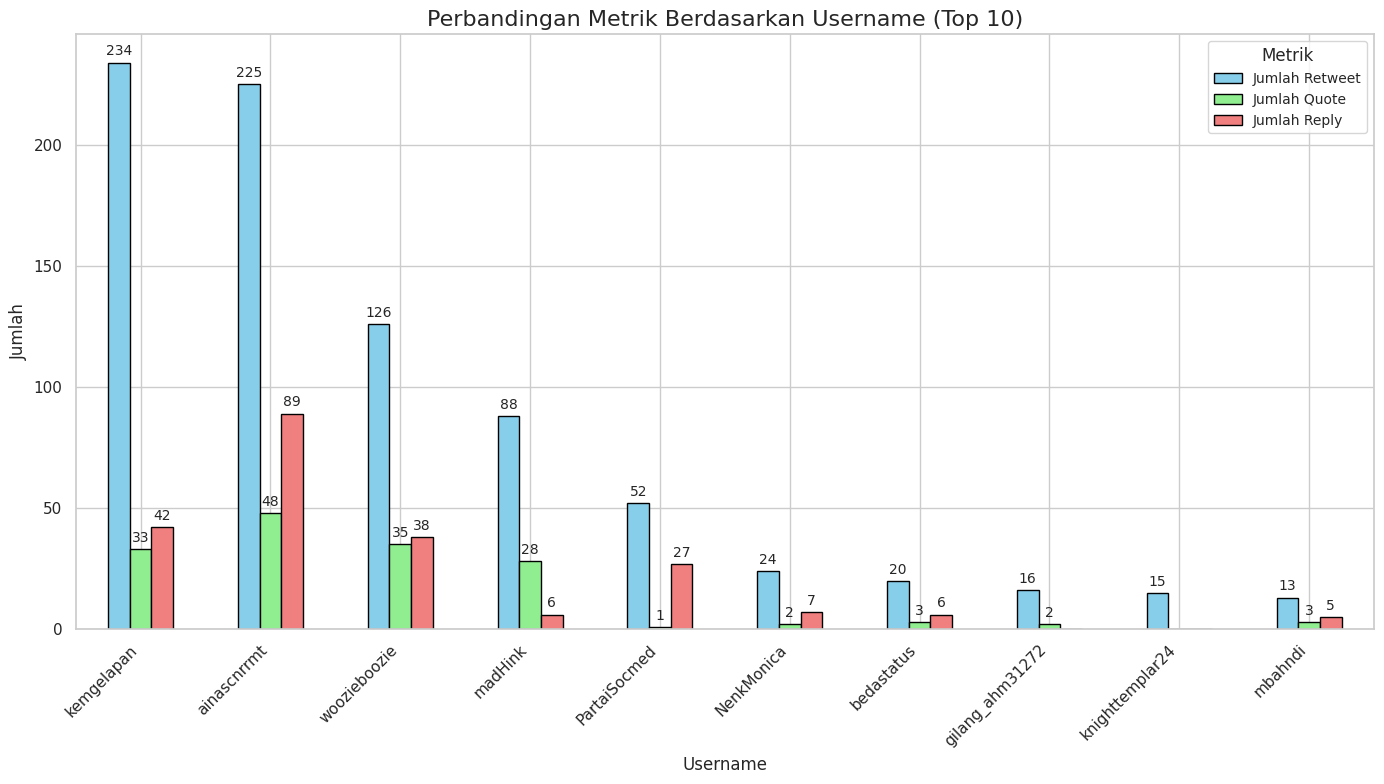

In [107]:
import matplotlib.pyplot as plt
import pandas as pd

# Mengambil pengguna dengan retweet, quote, dan reply tertinggi
top_retweet = data.sort_values('retweet_count', ascending=False).drop_duplicates(subset=['username'])[['username', 'retweet_count']].set_index('username').rename(columns={'retweet_count': 'Jumlah Retweet'})
top_quote = data.sort_values('quote_count', ascending=False).drop_duplicates(subset=['username'])[['username', 'quote_count']].set_index('username').rename(columns={'quote_count': 'Jumlah Quote'})
top_reply = data.sort_values('reply_count', ascending=False).drop_duplicates(subset=['username'])[['username', 'reply_count']].set_index('username').rename(columns={'reply_count': 'Jumlah Reply'})

# Menggabungkan semua data menjadi satu DataFrame
combined_data = (
    #pd.concat([total_tweets_per_user, top_retweet, top_quote, top_reply], axis=1)
    pd.concat([top_retweet, top_quote, top_reply], axis=1)
    .dropna()  # Hanya menyertakan pengguna yang ada di semua kategori
    .head(10)  # Ambil 10 pengguna teratas
)

# Membuat plot batang
ax = combined_data.plot(kind='bar', figsize=(14, 8), edgecolor='black', color=['skyblue', 'lightgreen', 'lightcoral', 'gold'])

# Menambahkan jumlah di atas setiap batang (hanya untuk nilai > 0)
for container in ax.containers:
    labels = [f'{int(value)}' if value > 0 else '' for value in container.datavalues]
    ax.bar_label(container, labels=labels, label_type='edge', fontsize=10, padding=3)

# Menambahkan judul dan label
plt.title('Perbandingan Metrik Berdasarkan Username (Top 10)', fontsize=16)
plt.xlabel('Username', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Metrik', fontsize=10)
plt.tight_layout()

# Menampilkan grafik
plt.show()


Berdasarkan visualisasi di atas, berikut adalah analisis dari 10 pengguna dengan jumlah retweet, quote, dan reply tertinggi dalam tweet mereka:

1. **Pengguna dengan Retweet Tertinggi**  
   - **"kemgelapan"** memiliki jumlah retweet tertinggi (234), menunjukkan bahwa kontennya sangat menarik dan sering dibagikan oleh pengguna lain.

2. **Pengguna dengan Quote Tertinggi**  
   - **"ainascrrmt"** (48) dan **"kemgelapan"** (42) menempati posisi teratas dalam jumlah quote. Hal ini menunjukkan bahwa konten mereka tidak hanya dibagikan, tetapi juga mendorong diskusi atau interpretasi lebih lanjut dari pengguna lain.

3. **Pengguna dengan Reply Tertinggi**  
   - **"ainascrrmt"** memimpin dengan jumlah reply tertinggi (89), diikuti oleh **"woozieboozie"** (35). Ini menunjukkan bahwa konten mereka cenderung mengundang percakapan langsung dengan pengguna lain.

4. **Pengguna dengan Dampak Terbesar**  
   - **"kemgelapan"** dan **"ainascrrmt"** adalah dua pengguna dengan dampak paling besar secara keseluruhan, karena mereka memimpin di hampir semua metrik (retweet, quote, dan reply).

Kesimpulan ini menunjukkan bahwa pengguna-pengguna tersebut memiliki pengaruh besar dalam diskusi terkait topik yang diangkat, baik melalui retweet maupun interaksi langsung seperti quote dan reply.

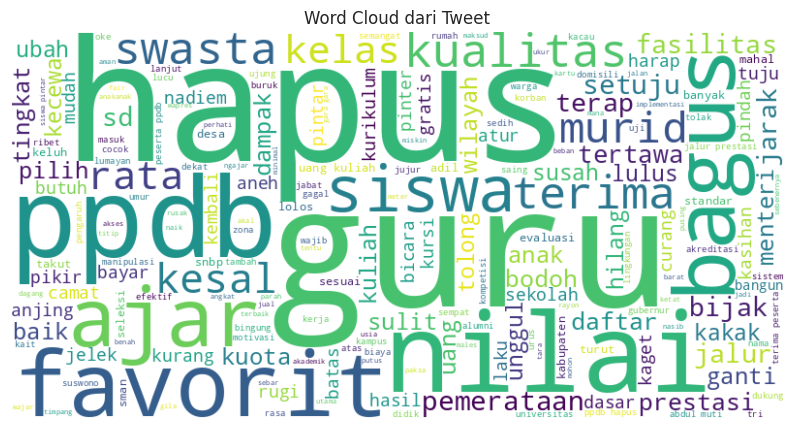

In [108]:
from wordcloud import WordCloud

# Gabungkan semua teks
all_text = data_twt['stemmed_text'].apply(lambda x: ' '.join(x)).str.cat(sep=' ') # Join the list of words into a single string for each row and then concatenate all the strings

# Buat WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Plot WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud dari Tweet')
plt.show()

Berdasarkan Word Cloud di atas, berikut adalah interpretasi utama yang dapat disimpulkan:

1. **Kata dengan Ukuran Besar**  
   Kata **Hapus**, **PPDB**, **Nilai**, **Favorit**, **Siswa**, dan **Kualitas** memiliki ukuran yang lebih besar, menunjukkan bahwa kata-kata ini paling banyak digunakan dalam diskusi oleh para pengguna.

2. **Kata "Hapus"**  
   - Kata **Hapus** sering digunakan dengan sentimen negatif, terutama oleh pengguna yang meminta pemerintah untuk menghapus kebijakan sistem zonasi dalam PPDB (Penerimaan Peserta Didik Baru).

3. **PPDB dan Sistem Zonasi**  
   - Sistem zonasi sangat terkait dengan PPDB, yang menjadi topik perhatian utama para pengguna. Kebijakan ini menuai pro dan kontra, terutama terkait dampaknya terhadap siswa.

4. **Nilai dan Siswa**  
   - Evaluasi terkait **Nilai** dan **Siswa** juga menjadi fokus diskusi. Banyak pengguna menyoroti tren siswa SMP-SMA yang kurang lancar membaca dan berhitung.  
   - Sistem zonasi dianggap mengurangi prioritas siswa terhadap nilai akademik karena mereka beranggapan bahwa jarak ke sekolah sudah cukup untuk menentukan kelulusan dalam seleksi.

5. **Favorit dan Kualitas**  
   - Kata **Favorit** dan **Kualitas** banyak digunakan oleh pengguna yang kurang setuju dengan sistem zonasi.  
   - Sistem ini bertujuan untuk pemerataan dan menghilangkan istilah "sekolah favorit" di Indonesia. Namun, kurangnya pemerataan infrastruktur sekolah, distribusi guru, dan distribusi lokasi sekolah membuat banyak pengguna merasa kecewa. Akibatnya, sekolah favorit atau swasta tetap menjadi pilihan utama.

Kesimpulan ini mencerminkan keresahan pengguna terhadap kebijakan sistem zonasi, yang dianggap masih memiliki banyak kekurangan dalam implementasinya, terutama terkait dengan kualitas pendidikan dan pemerataan akses sekolah.